In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from src.black_scholes import black_scholes_price

In [2]:
def simulate_gbm_path(S0, r, sigma, T, N):
    dt = T / N
    t = np.linspace(0, T, N + 1)
    W = np.random.standard_normal(size=N)
    W = np.insert(np.cumsum(np.sqrt(dt) * W), 0, 0.0)
    S = S0 * np.exp((r - 0.5 * sigma ** 2) * t + sigma * W)
    return t, S

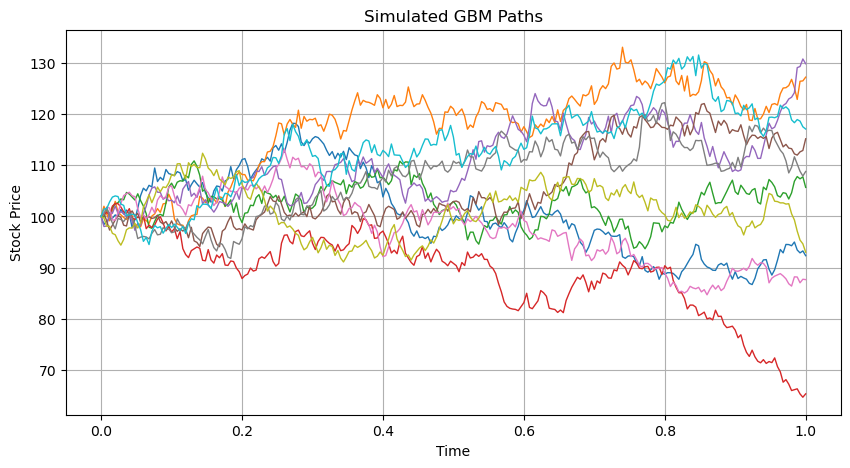

In [18]:
S0, r, sigma, T, N_paths, steps = 100, 0.05, 0.2, 1.0, 10, 250

plt.figure(figsize=(10, 5))
for _ in range(N_paths):
    t, S = simulate_gbm_path(S0, r, sigma, T, steps)
    plt.plot(t, S, lw=1)

plt.title("Simulated GBM Paths")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.grid(True)
plt.savefig("gbm_paths.png")
plt.show()

In [8]:
def monte_carlo_option_price(S0, K, T, r, sigma, N_sim, option_type="call"):
    Z = np.random.standard_normal(N_sim)
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)

    if option_type == "call":
        payoff = np.maximum(ST - K, 0)
    else:
        payoff = np.maximum(K - ST, 0)

    return np.exp(-r * T) * np.mean(payoff)


In [9]:
K = 100
bsm_call = black_scholes_price(S0, K, T, r, sigma, option_type="call")
mc_call = monte_carlo_option_price(S0, K, T, r, sigma, 100_000, option_type="call")

print(f"Black-Scholes Call Price: ₹{bsm_call:.4f}")
print(f"Monte Carlo Call Price:   ₹{mc_call:.4f}")

Black-Scholes Call Price: ₹10.4506
Monte Carlo Call Price:   ₹10.5203


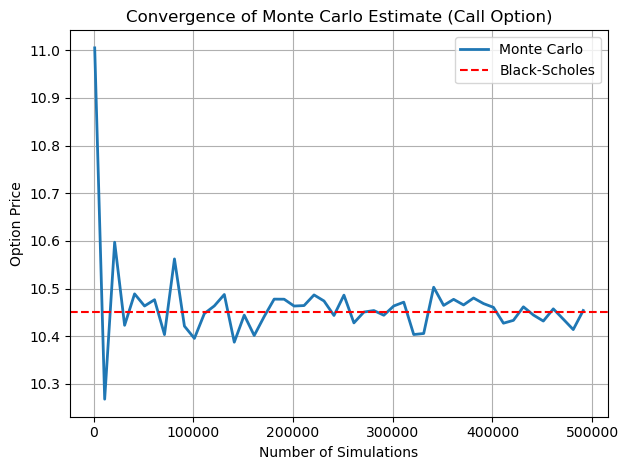

In [29]:
Ns = np.arange(1000, 500000, 10000)
prices = [monte_carlo_option_price(S0, K, T, r, sigma, N, option_type="call") for N in Ns]

plt.plot(Ns, prices, label="Monte Carlo", lw=2)
plt.axhline(bsm_call, color='red', linestyle='--', label="Black-Scholes")
plt.title("Convergence of Monte Carlo Estimate (Call Option)")
plt.xlabel("Number of Simulations")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("monte_carlo_vs_bsm_call.png")
plt.show()

- GBM paths follow lognormal distribution
- Monte Carlo pricing estimates the risk-neutral expectation
- MC converges slowly but flexibly handles any payoff
- Matches Black-Scholes in expectation for European options